### Full Name : Ahmadreza majlesara
### Student Number : 400101861


# Support Vector Machines (SVM)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [33]:
df = pd.read_csv("Liver_Disease.csv") 
df.head()
print(df['label'].unique())

[1 2]


### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

Shape of the dataset: (583, 11)
Missing entries columnwise:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64
Class distribution:
 label
1    416
2    167
Name: count, dtype: int64


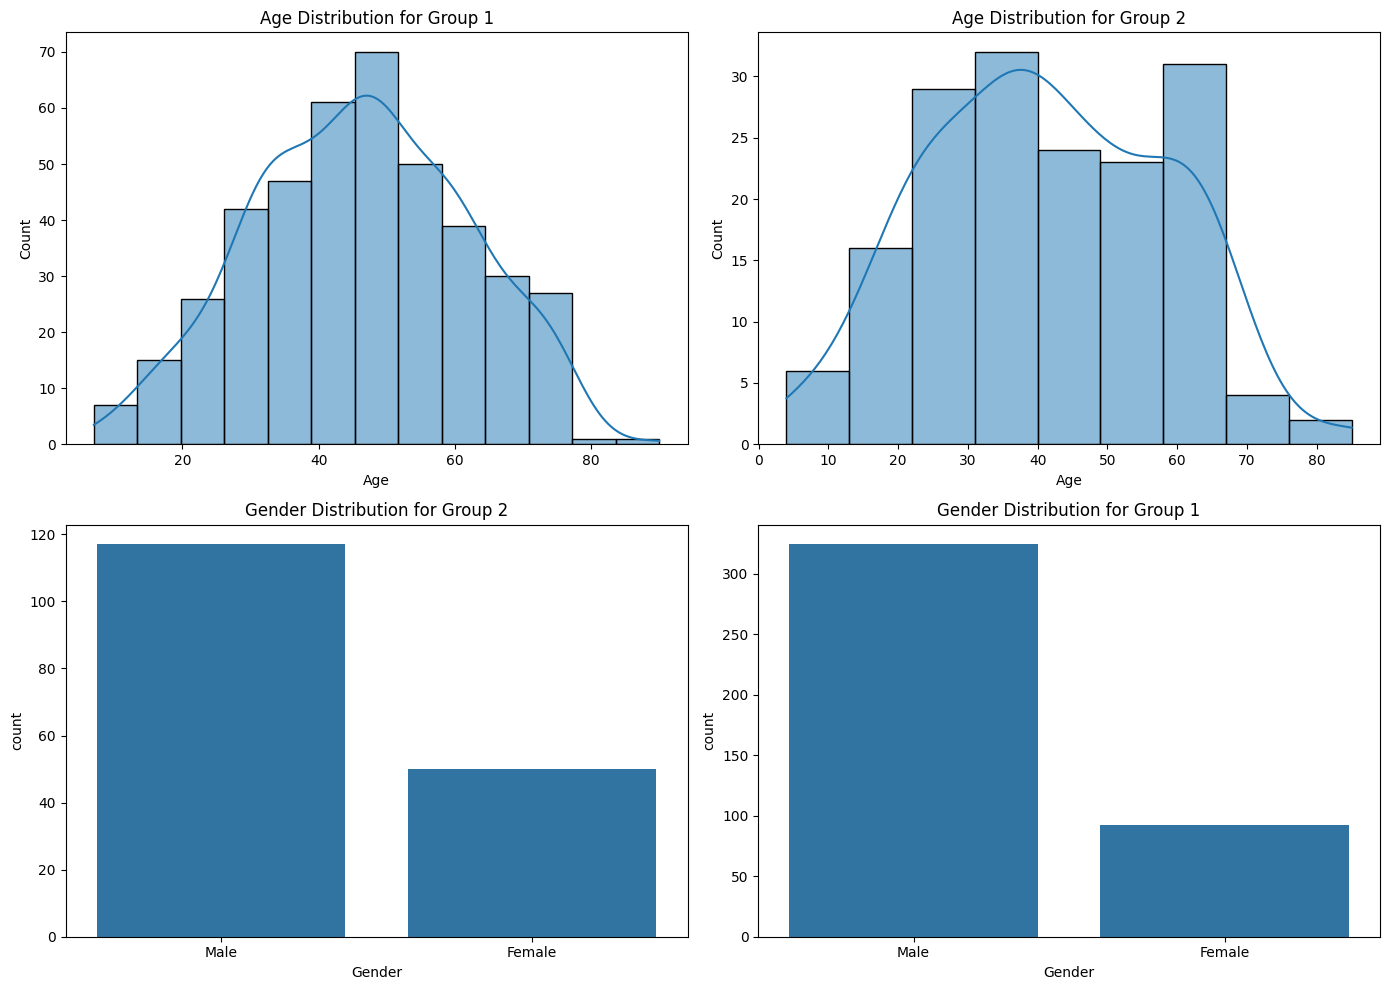

In [34]:
print("Shape of the dataset:", df.shape)

print("Missing entries columnwise:\n", df.isnull().sum())

print("Class distribution:\n", df['label'].value_counts())

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df[df['label'] == 1]['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution for Group 1')

sns.histplot(df[df['label'] == 2]['Age'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution for Group 2')

sns.countplot(x='Gender', data=df[df['label'] == 2], ax=axes[1, 0], order=['Male', 'Female'])
axes[1, 0].set_title('Gender Distribution for Group 2')

sns.countplot(x='Gender', data=df[df['label'] == 1], ax=axes[1, 1], order=['Male', 'Female'])
axes[1, 1].set_title('Gender Distribution for Group 1')

plt.tight_layout()
plt.show()


##### Question: What do you conclude from the plots?

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [35]:
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    Q1 = df[numeric_cols].quantile(0.12)
    Q3 = df[numeric_cols].quantile(0.88)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]
    
    return df_clean

df_clean = remove_outliers_iqr(df)
print(df_clean['label'].unique())
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_clean.shape)

[1 2]
Shape before removing outliers: (583, 11)
Shape after removing outliers: (509, 11)


#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [36]:
df_clean.loc[:, 'Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})
print(df_clean['label'].unique())

[1 2]


In [37]:
numeric_cols_clean = df_clean.select_dtypes(include=['float64', 'int64'])
numeric_cols_clean = numeric_cols_clean.drop('label', axis=1).columns
for col in numeric_cols_clean:
    df_clean.loc[:, col] = (df_clean[col] - df_clean[col].min()) / (df_clean[col].max() - df_clean[col].min())
print(df_clean['label'].unique())

[1 2]


### SVM

#### spliting data

In [38]:
X = df_clean.drop('label', axis=1)
y = df_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
580,0.558140,0,0.025974,0.013333,0.213615,0.171171,0.098485,0.536232,0.500000,0.4375
162,0.651163,0,0.350649,0.346667,0.629108,0.148649,0.141414,0.391304,0.195652,0.1250
470,0.720930,0,0.045455,0.053333,0.122066,0.013514,0.116162,0.637681,0.695652,0.6625
369,0.627907,1,0.025974,0.013333,0.078638,0.063063,0.037879,0.623188,0.673913,0.6250
460,0.209302,1,0.116883,0.120000,0.178404,0.671171,0.103535,0.405797,0.347826,0.3125


### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [39]:
X_train = X_train.dropna()
X_test = X_test.dropna()

y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f"Model accuracy: {accuracy:.2f}")


print(classification_report(y_test, y_pred))


Model accuracy: 0.72
              precision    recall  f1-score   support

           1       0.72      1.00      0.84        73
           2       0.00      0.00      0.00        28

    accuracy                           0.72       101
   macro avg       0.36      0.50      0.42       101
weighted avg       0.52      0.72      0.61       101



c:\Users\Digi Max\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Digi Max\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Digi Max\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

grid.fit(X_train, y_train)

print("Best parameters found: ", grid.best_params_)
print("Best estimator found: ", grid.best_estimator_)

grid_predictions = grid.predict(X_test)

grid_accuracy = np.mean(grid_predictions == y_test)
print(f"Grid Search Model accuracy: {grid_accuracy:.2f}")

print(classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

c:\Users\Digi Max\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Digi Max\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Digi Max\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Train an svm model on the entire training data using the parameters you found in the previous step.

In [41]:
best_svm_model = SVC(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel=grid.best_params_['kernel'])
best_svm_model.fit(X_train, y_train)

best_y_pred = best_svm_model.predict(X_test)

best_accuracy = np.mean(best_y_pred == y_test)
print(f"Best Model accuracy: {best_accuracy:.2f}")
print(classification_report(y_test, best_y_pred))


Best Model accuracy: 0.72
              precision    recall  f1-score   support

           1       0.72      1.00      0.84        73
           2       0.00      0.00      0.00        28

    accuracy                           0.72       101
   macro avg       0.36      0.50      0.42       101
weighted avg       0.52      0.72      0.61       101



c:\Users\Digi Max\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Digi Max\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Digi Max\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

Each entry in a confusion matrix represents the number of instances that were classified into a particular category. Here's a breakdown of what each entry (from top left to bottom right) means:

True Positive (TP): The number of instances correctly predicted as the positive class.

True Negative (TN): The number of instances correctly predicted as the negative class.

False Positive (FP): The number of instances incorrectly predicted as the positive class (also known as Type I error).

False Negative (FN): The number of instances incorrectly predicted as the negative class (also known as Type II error).

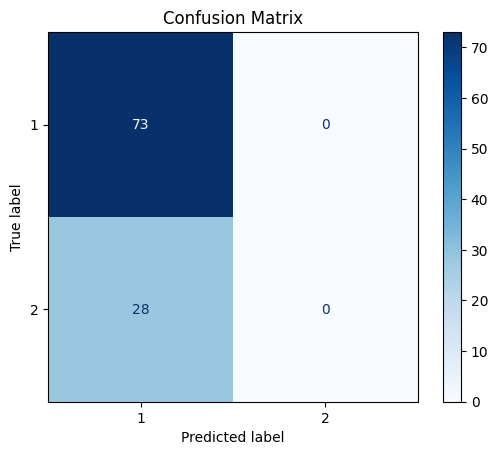

Best Model accuracy: 0.72


In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, best_y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print(f"Best Model accuracy: {best_accuracy:.2f}")


Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# Identify outliers in the original dataset
def identify_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]
    
    return outliers

df_copy = df.copy()
df_copy.loc[:, 'Gender'] = df_copy['Gender'].map({'Male': 0, 'Female': 1})
outliers = identify_outliers_iqr(df_copy)

# Append outliers to the cleaned dataset
df_with_outliers = pd.concat([df_clean, outliers], ignore_index=True)
df_with_outliers
# Split the data
X_outliers = df_with_outliers.drop('label', axis=1)
y_outliers = df_with_outliers['label']

X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(X_outliers, y_outliers, test_size=0.2, random_state=42)
X_train_outliers.dropna(inplace=True)
X_test_outliers.dropna(inplace=True)

y_train_outliers = y_train_outliers[X_train_outliers.index]
y_test_outliers = y_test_outliers[X_test_outliers.index]
print(df_copy['label'].unique())
# Train SVM model
svm_model_outliers = SVC(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel=grid.best_params_['kernel'])
svm_model_outliers.fit(X_train_outliers, y_train_outliers)
y_pred_svm_outliers = svm_model_outliers.predict(X_test_outliers)
svm_accuracy_outliers = accuracy_score(y_test_outliers, y_pred_svm_outliers)

# Train Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_outliers, y_train_outliers)
y_pred_log_reg = log_reg_model.predict(X_test_outliers)
log_reg_accuracy = accuracy_score(y_test_outliers, y_pred_log_reg)

print(f"SVM Model accuracy with outliers: {svm_accuracy_outliers:.2f}")
print(f"Logistic Regression Model accuracy with outliers: {log_reg_accuracy:.2f}")

print("Classification report for SVM model with outliers:\n", classification_report(y_test_outliers, y_pred_svm_outliers))
print("Classification report for Logistic Regression model with outliers:\n", classification_report(y_test_outliers, y_pred_log_reg))


[1 2]
SVM Model accuracy with outliers: 0.75
Logistic Regression Model accuracy with outliers: 0.76
Classification report for SVM model with outliers:
               precision    recall  f1-score   support

           1       0.75      1.00      0.86       104
           2       0.00      0.00      0.00        34

    accuracy                           0.75       138
   macro avg       0.38      0.50      0.43       138
weighted avg       0.57      0.75      0.65       138

Classification report for Logistic Regression model with outliers:
               precision    recall  f1-score   support

           1       0.76      1.00      0.86       104
           2       1.00      0.03      0.06        34

    accuracy                           0.76       138
   macro avg       0.88      0.51      0.46       138
weighted avg       0.82      0.76      0.66       138



c:\Users\Digi Max\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Digi Max\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Digi Max\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av